In [1]:
import pandas as pd
import numpy as np
from pandas import Series
from matplotlib import pyplot as plt
from scipy.stats.stats import pearsonr 
import multiprocessing
import math
from statsmodels.tsa.stattools import adfuller

In [2]:
data = pd.read_csv('STOCK.txt')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12074 entries, 0 to 12073
Data columns (total 7 columns):
Date       12074 non-null object
Open       12074 non-null float64
High       12074 non-null float64
Low        12074 non-null float64
Close      12074 non-null float64
Volume     12074 non-null int64
OpenInt    12074 non-null int64
dtypes: float64(4), int64(2), object(1)
memory usage: 660.4+ KB


In [4]:
data.describe()

,Open,High,Low,Close,Volume,OpenInt
count,12074.000000,12074.000000,12074.000000,12074.000000,1.207400e+04,12074.0
mean,24.419762,24.751516,24.056557,24.406203,3.337757e+06,0.0
std,23.647989,23.990163,23.260402,23.627596,5.203407e+06,0.0
min,1.252800,1.273000,1.232800,1.252800,0.000000e+00,0.0
25%,4.536150,4.593400,4.452900,4.536150,5.334490e+05,0.0
50%,16.453000,16.662000,16.243000,16.474000,1.395958e+06,0.0
75%,35.095750,35.507500,34.575000,35.001500,3.202536e+06,0.0
max,99.930000,101.820000,97.212000,98.864000,1.159616e+08,0.0


In [5]:
data[7400:7800]

,Date,Open,High,Low,Close,Volume,OpenInt
7400,1999-04-16,53.703,53.949,51.991,53.389,6414037,0
7401,1999-04-19,54.078,57.750,53.827,55.409,4350357,0
7402,1999-04-20,54.723,54.788,52.890,53.576,3576573,0
7403,1999-04-21,53.827,54.532,53.200,53.327,2181787,0
7404,1999-04-22,53.450,55.666,53.327,54.205,1847292,0
7405,1999-04-23,53.327,55.167,53.327,54.723,1422085,0
7406,1999-04-26,54.596,54.658,53.450,53.949,1097073,0
7407,1999-04-27,53.949,57.063,53.949,56.101,2451052,0
7408,1999-04-28,56.752,64.163,56.560,62.827,6276772,0
7409,1999-04-29,62.891,66.501,62.891,65.541,6731674,0


In [6]:
def plot_data(data, column, color):
    plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(data[:][column].rolling(20).sum(),color=color)
    plt.title(column)
    plt.grid(True)
    plt.show()
#ye_2017_normal = year_2017[:-35]

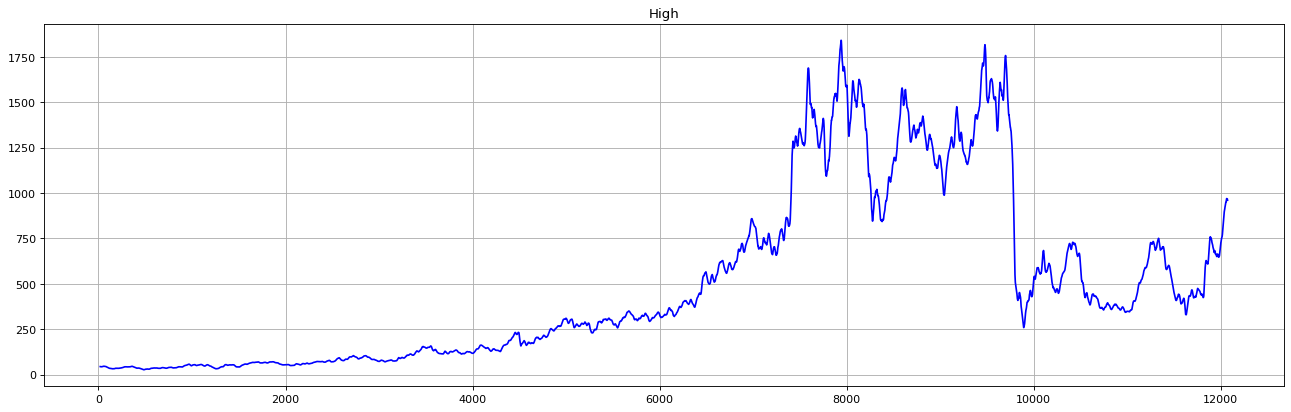

In [7]:
plot_data(data, 'High', 'blue')

In [8]:
def adf_stationarity_test(data, column):
    X = data[:][column].values
    result = adfuller(X[:])
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    print('\n')

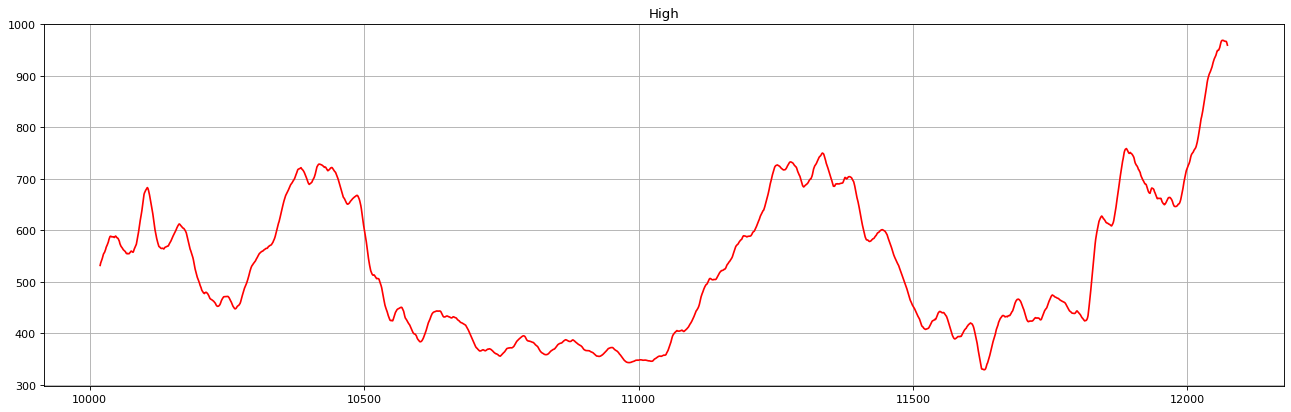

In [9]:
plot_data(data[10000:], 'High','red')

In [10]:
print("AUGMENTED DICKY FULLER TEST FOR STATIONARITY \n")

print("RESULTS FOR HIGH VALUES \n")
adf_stationarity_test(data[10000:],'High')

print("RESULTS FOR LOW VALUES \n")
adf_stationarity_test(data[10000:],'Low')

print("RESULTS FOR OPEN VALUES \n")
adf_stationarity_test(data[10000:],'Open')

print("RESULTS FOR CLOSE VALUES \n")
adf_stationarity_test(data[10000:],'Close')

AUGMENTED DICKY FULLER TEST FOR STATIONARITY 

RESULTS FOR HIGH VALUES 

ADF Statistic: -1.197394
p-value: 0.674716
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


RESULTS FOR LOW VALUES 

ADF Statistic: -1.333855
p-value: 0.613545
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


RESULTS FOR OPEN VALUES 

ADF Statistic: -1.247650
p-value: 0.652770
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


RESULTS FOR CLOSE VALUES 

ADF Statistic: -1.259750
p-value: 0.647380
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568




In [11]:
## Differencing the DATASET by difference 1
def add_difference(s):
    copy = list(data[:12073][s].values)
    difference = list(data[s][1:] - copy)
    difference.append(0)
    return(difference)
data['difference_High'] = add_difference('High')
data['difference_Low'] = add_difference('Low')
data['difference_Close'] = add_difference('Close')
data['difference_Open'] = add_difference('Open')

In [12]:
data

,Date,Open,High,Low,Close,Volume,OpenInt,difference_High,difference_Low,difference_Close,difference_Open
0,1970-01-02,2.2972,2.3178,2.2972,2.2972,26437,0,-0.0206,-0.0428,-0.0213,0.0000
1,1970-01-05,2.2972,2.2972,2.2544,2.2759,29887,0,-0.0213,-0.0202,-0.0417,-0.0213
2,1970-01-06,2.2759,2.2759,2.2342,2.2342,106900,0,-0.0417,0.0000,0.0000,-0.0417
3,1970-01-07,2.2342,2.2342,2.2342,2.2342,85061,0,0.0000,-0.0203,-0.0203,0.0000
4,1970-01-08,2.2342,2.2342,2.2139,2.2139,66669,0,-0.0203,-0.0218,-0.0218,-0.0203
5,1970-01-09,2.2139,2.2139,2.1921,2.1921,72418,0,-0.0218,-0.0204,-0.0204,-0.0218
6,1970-01-12,2.1921,2.1921,2.1717,2.1717,94257,0,0.0000,0.0000,0.0204,-0.0204
7,1970-01-13,2.1717,2.1921,2.1717,2.1921,67818,0,0.0000,0.0000,-0.0204,0.0204
8,1970-01-14,2.1921,2.1921,2.1717,2.1717,66669,0,0.0000,0.0000,0.0204,-0.0204
9,1970-01-15,2.1717,2.1921,2.1717,2.1921,91958,0,0.0000,0.0000,0.0000,0.0204


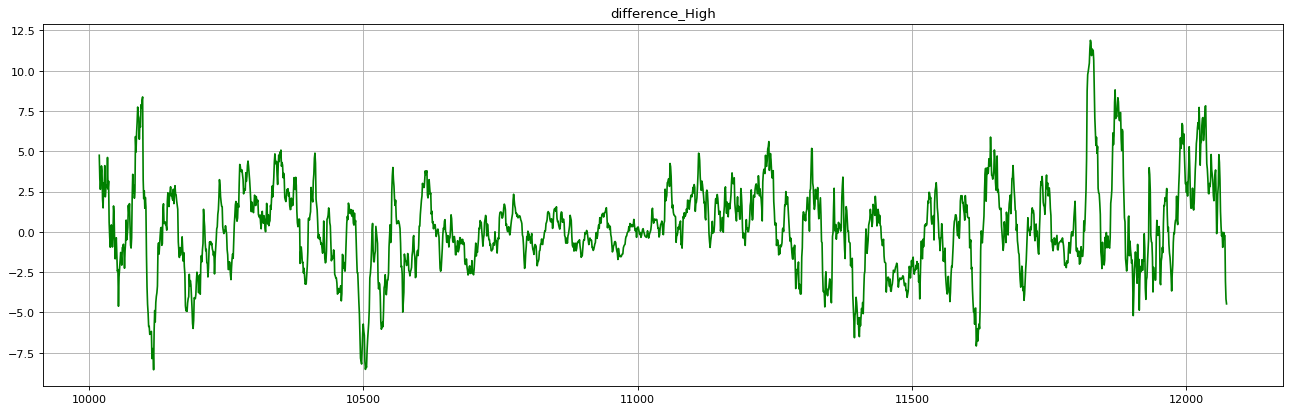

In [13]:
plot_data(data[10000:], 'difference_High','green')


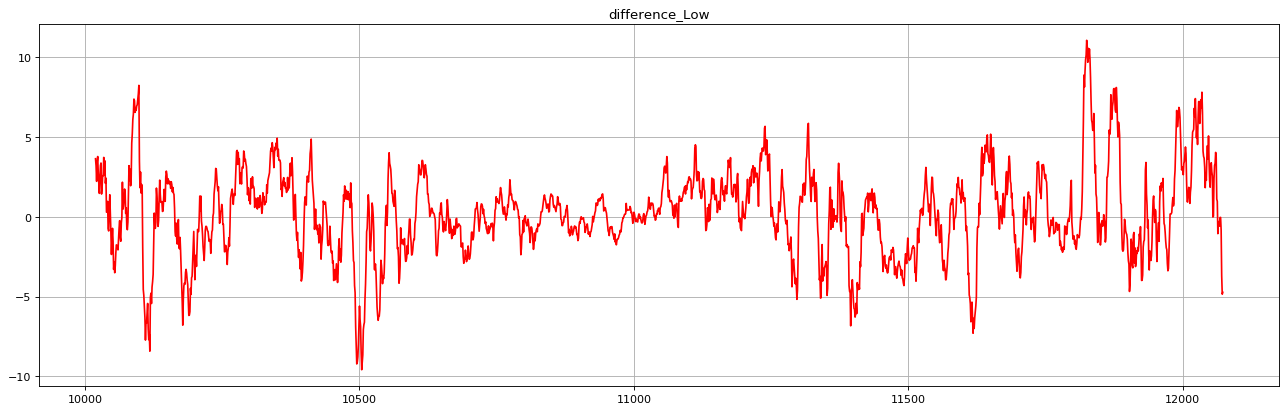

In [14]:
plot_data(data[10000:], 'difference_Low','red')

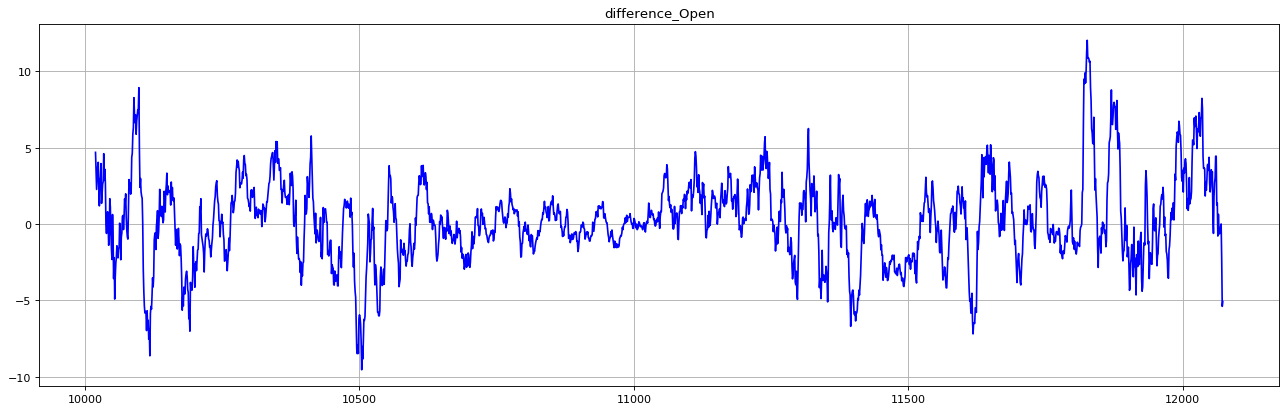

In [15]:
plot_data(data[10000:], 'difference_Open','blue')

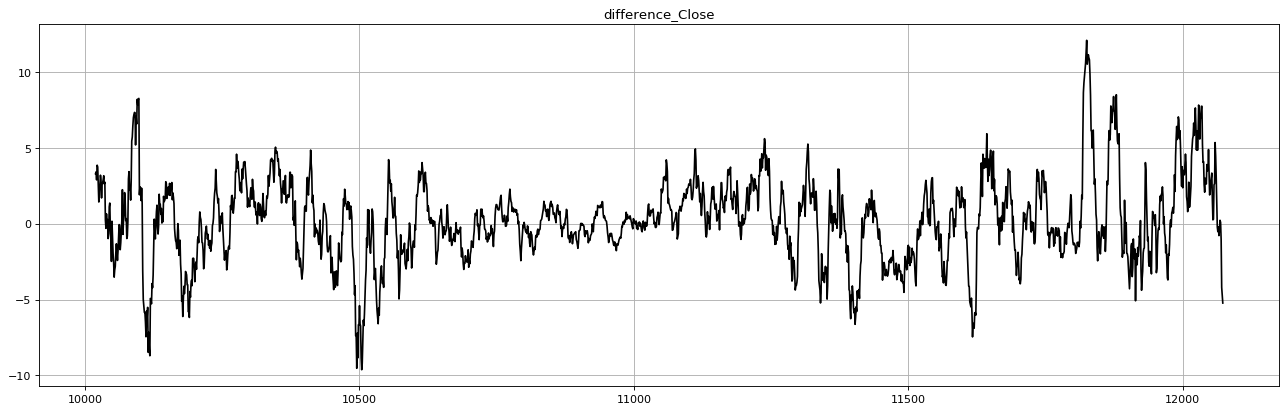

In [16]:
plot_data(data[10000:], 'difference_Close','black')

In [17]:
print("AUGMENTED DICKY FULLER TEST FOR STATIONARITY \n")

print("RESULTS FOR difference_High VALUES \n")
adf_stationarity_test(data[10000:],'difference_High')

print("RESULTS FOR difference_LOW VALUES \n")
adf_stationarity_test(data[10000:],'difference_Low')

print("RESULTS FOR difference_OPEN VALUES \n")
adf_stationarity_test(data[10000:],'difference_Open')

print("RESULTS FOR difference_CLOSE VALUES \n")
adf_stationarity_test(data[10000:],'difference_Close')

AUGMENTED DICKY FULLER TEST FOR STATIONARITY 

RESULTS FOR difference_High VALUES 

ADF Statistic: -40.480416
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


RESULTS FOR difference_LOW VALUES 

ADF Statistic: -24.739959
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


RESULTS FOR difference_OPEN VALUES 

ADF Statistic: -45.040802
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


RESULTS FOR difference_CLOSE VALUES 

ADF Statistic: -45.195568
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568




In [18]:
## THE FUNCTION PREPARE A PARTICULAR COLUMN OF THE DATASET FOR BUILDING MODEL
def data_prep(data, column):
#input file, formatted as having 2 columns: position, and value
    txn = data.copy()
    txn = txn[10000:(len(data)-30)][column]
    return(txn)
    
# For each lag, this for loop identifies pairs of loci in the genome with that lag, and saves their 
# expression values in a list. Then it computes the correlations between the 2 lists.

def pearson_correlation(numbers_x, numbers_y):
    x = numbers_x - np.mean(numbers_x)
    y = numbers_y - np.mean(numbers_y)
    return (x * y).sum() / np.sqrt((x**2).sum() * (y**2).sum())

def get_corr(lag,txn):
    exp1 = []
    exp2 = []
    for i in txn.index:
        e1 = txn[i]
        if (i + lag) > LENGTH_GENOME:
            break
        if (i + lag) in txn.index:
            e2 = txn[i+lag]
            #print(e2)
            if  hasattr(e1,"__len__"):
                e1 = e1.iloc[0]
            if  hasattr(e2,"__len__"):
                e2 = e2.iloc[0]
            exp1.append(e1)
            exp2.append(e2)
    return[lag, pearson_correlation(exp1,exp2)]

    
# Forming the correlation matrix
def ACF_mat(cors):
    corr_mat = []
    for i in range(len(cors)-1):
        lag_x = []
        for j in range(MAX_LAG):
            lag_x.append(cors[abs(j-i)])
        corr_mat.append(lag_x)
    return(corr_mat)


# USING THE EXACT METHOD TO FIND OUT THE OPTIMAL CHOICES FOR BETA
def AR_Params(ACF_mat,txn):
    beta = np.random.rand(len(ACF_mat))
    r_lag = get_corr(MAX_LAG, txn )[1]
    rhs = ACF_mat[0].copy()
    rhs.append(r_lag)
    rhs.pop(0)
    #print("RHS")
    #print(rhs)
    #print("INVERSE ACF MATRIX:")
    #print(np.linalg.inv(ACF_mat))
    beta = np.dot(np.linalg.inv(ACF_mat),rhs)
    return(beta)    

## END-TO-END FUNCTION
def AR_Model(p, data):

    RES = []
    MAX_LAG = p
    for i in range(MAX_LAG+1):
        p = get_corr(i, data)
        RES.append(p)
    lags = []
    cors = []
    for i in range(0, len(RES)):
        lags.append(RES[i][0])
        cors.append(RES[i][1])
        #print(cors)
    
    cor_mat = ACF_mat(cors)
    #print("ACF Matrix")
    #print(cor_mat)
    beta = AR_Params(cor_mat, data)
    return(beta)    

## To predict values for next 1 month 
def predict(beta,true_values):
    predictions = []
    for i in range(len(true_values)-MAX_LAG):
        prediction = np.mean(true_values) + np.dot(beta, true_values[i:i+MAX_LAG])
        predictions.append(prediction)
    return(predictions)

def RMSE(true_value, prediction):
    SSE = 0
    for i in range(len(prediction)):
        SSE += (true_value[i]-prediction[i])**2
    RMSE = np.sqrt(SSE/len(predictions))
    return(RMSE)
#RMSE(true_values[MAX_LAG:],predictions)


In [19]:
data_High = data_prep(data, 'difference_High')
MAX_LAG = 10
LENGTH_GENOME = max(data_High.index)
RES = []
for i in range(MAX_LAG+1):
    p = np.round(get_corr(i, data_High),3)
    RES.append(p)
lags = []
cors = []
for i in range(0, len(RES)):
    lags.append(RES[i][0])
    cors.append(RES[i][1])
        #print(cors)
    
cor_mat = ACF_mat(cors)
cor_mat = np.array(cor_mat)
print(cor_mat)

[[ 1.     0.118 -0.003 -0.005  0.008  0.007  0.016 -0.01  -0.021  0.035]
 [ 0.118  1.     0.118 -0.003 -0.005  0.008  0.007  0.016 -0.01  -0.021]
 [-0.003  0.118  1.     0.118 -0.003 -0.005  0.008  0.007  0.016 -0.01 ]
 [-0.005 -0.003  0.118  1.     0.118 -0.003 -0.005  0.008  0.007  0.016]
 [ 0.008 -0.005 -0.003  0.118  1.     0.118 -0.003 -0.005  0.008  0.007]
 [ 0.007  0.008 -0.005 -0.003  0.118  1.     0.118 -0.003 -0.005  0.008]
 [ 0.016  0.007  0.008 -0.005 -0.003  0.118  1.     0.118 -0.003 -0.005]
 [-0.01   0.016  0.007  0.008 -0.005 -0.003  0.118  1.     0.118 -0.003]
 [-0.021 -0.01   0.016  0.007  0.008 -0.005 -0.003  0.118  1.     0.118]
 [ 0.035 -0.021 -0.01   0.016  0.007  0.008 -0.005 -0.003  0.118  1.   ]]


[0.11779269]
RMSE:  0.7203388684038461


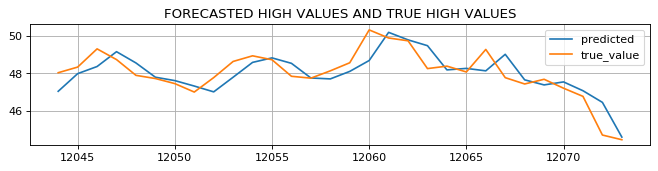

In [32]:
#### TRAINING MODEL FOR A PARTICULAR LAG VALUE AND DATASET
data_High = data_prep(data, 'difference_High')
MAX_LAG = 1
LENGTH_GENOME = max(data_High.index)
beta_High = AR_Model(MAX_LAG, data_High)
print(beta_High)

## PREDICTING DIFFERENCED VALUES USING BETA
true_values = data.copy()[(len(data)-30)-MAX_LAG:]['difference_High'].values
predictions = predict(beta_High, true_values)

## PREDICTING ACTUAL VALUES
true_high_values = list(data.copy()[(len(data)-30)-MAX_LAG:].High)
predict_HIGH = []
for i in range(0,len(predictions)):
    predicted_value = round(true_high_values[i+MAX_LAG-1] + predictions[i],2)
    predict_HIGH.append(predicted_value)
# print((predict_HIGH))
# print(true_high_values)print("RMSE: ", RMSE(predict_High, true_High_values[MAX_LAG:]))
print("RMSE: ", RMSE(predict_HIGH, true_high_values[MAX_LAG:]))

## PLOTTING VALUES PREDICTED V/S ACUTAL
import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(10, 2), dpi=80, facecolor='w', edgecolor='k')
plt.plot(data.index[len(data)-30:],predict_HIGH,data.index[len(data)-30:],true_high_values[MAX_LAG:])
plt.title('FORECASTED HIGH VALUES AND TRUE HIGH VALUES')
plt.legend(['predicted','true_value'])
plt.grid(True)
plt.show()

[0.14017162]
RMSE:  0.6539597337247409


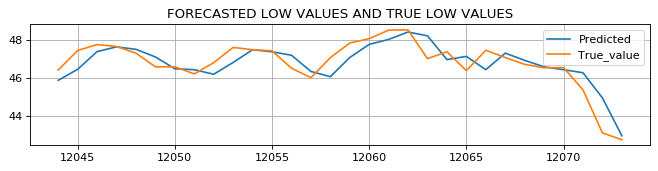

In [33]:
#### TRAINING MODEL FOR A PARTICULAR LAG VALUE AND DATASET
data_Low = data_prep(data, 'difference_Low')
MAX_LAG = 1
LENGTH_GENOME = max(data_Low.index)
beta_Low = AR_Model(MAX_LAG, data_Low)
print(beta_Low)

## PREDICTING DIFFERENCED VALUES USING BETA
true_values = data.copy()[(len(data)-30)-MAX_LAG:]['difference_Low'].values
predictions = predict(beta_Low, true_values)

## PREDICTING ACTUAL VALUES
true_Low_values = list(data.copy()[(len(data)-30)-MAX_LAG:].Low)
predict_Low = []
for i in range(len(predictions)):
    predicted_value = round(true_Low_values[i+MAX_LAG-1] + predictions[i],2)
    predict_Low.append(predicted_value)
# print((predict_Low))
# print(true_Low_values)
print("RMSE: ", RMSE(predict_Low, true_Low_values[MAX_LAG:]))

## PLOTTING VALUES PREDICTED V/S ACUTAL
import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(10, 2), dpi=80, facecolor='w', edgecolor='k')
plt.plot(data.index[len(data)-30:],predict_Low,data.index[len(data)-30:],true_Low_values[MAX_LAG:])
plt.title('FORECASTED LOW VALUES AND TRUE LOW VALUES')
plt.grid(True)
plt.legend(['Predicted','True_value'])
plt.show()

[0.00754048]
RMSE:  0.9412775007049363


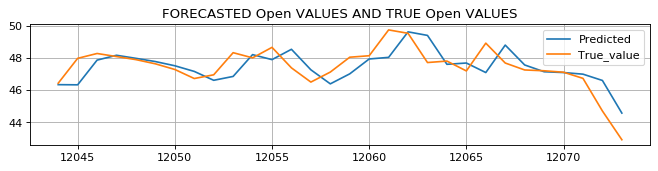

In [34]:
#### TRAINING MODEL FOR A PARTICULAR LAG VALUE AND DATASET
data_Open = data_prep(data, 'difference_Open')
MAX_LAG = 1
LENGTH_GENOME = max(data_Open.index)
beta_Open = AR_Model(MAX_LAG, data_Open)
print(beta_Open)

## PREDICTING DIFFERENCED VALUES USING BETA
true_values = data.copy()[(len(data)-30)-MAX_LAG:]['difference_Open'].values
predictions = predict(beta_Open, true_values)

## PREDICTING ACTUAL VALUES
true_Open_values = list(data.copy()[(len(data)-30)-MAX_LAG:].Open)
predict_Open = []
for i in range(len(predictions)):
    predicted_value = round(true_Open_values[i+MAX_LAG -1] + predictions[i],2)
    predict_Open.append(predicted_value)
# print((predict_Open))
# print(true_Open_values)
print("RMSE: ", RMSE(predict_Open, true_Open_values[MAX_LAG:]))

## PLOTTING VALUES PREDICTED V/S ACUTAL
import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(10, 2), dpi=80, facecolor='w', edgecolor='k')
plt.plot(data.index[len(data)-30:],predict_Open,data.index[len(data)-30:],true_Open_values[MAX_LAG:])
plt.title('FORECASTED Open VALUES AND TRUE Open VALUES')
plt.grid(True)
plt.legend(['Predicted','True_value'])
plt.show()

[ 0.00397738  0.00380829  0.01220685 -0.01357366  0.01431723  0.01895596
 -0.02155343 -0.0147526  -0.0105753   0.03269475]
RMSE: 0.8221009670350711


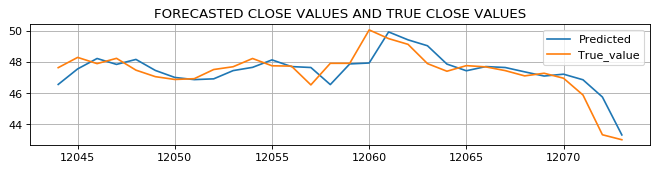

In [36]:
#### TRAINING MODEL FOR A PARTICULAR LAG VALUE AND DATASET
data_Close = data_prep(data, 'difference_Close')
MAX_LAG = 10
LENGTH_GENOME = max(data_Close.index)
beta_Close = AR_Model(MAX_LAG, data_Close)
print(beta_Close)

## PREDICTING DIFFERENCED VALUES USING BETA
true_values = data.copy()[(len(data)-30)-MAX_LAG:]['difference_Close'].values
predictions = predict(beta_Close, true_values)

## PREDICTING ACTUAL VALUES
true_Close_values = list(data.copy()[(len(data)-30)-MAX_LAG:].Close)
predict_Close = []
for i in range(len(predictions)):
    predicted_value = round(true_Close_values[i+MAX_LAG-1] + predictions[i],2)
    predict_Close.append(predicted_value)
print("RMSE:",RMSE(predict_Close, true_Close_values[MAX_LAG:]))

## PLOTTING VALUES PREDICTED V/S ACUTAL
import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(10, 2), dpi=80, facecolor='w', edgecolor='k')
plt.plot(data.index[len(data)-30:],predict_Close,data.index[len(data)-30:],true_Close_values[MAX_LAG:])
plt.title('FORECASTED CLOSE VALUES AND TRUE CLOSE VALUES')
plt.grid(True)
plt.legend(['Predicted','True_value'])
plt.show()

In [24]:
###### RMSE for different values of p for one High_DATASET
#### TRAINING MODEL FOR A PARTICULAR LAG VALUE AND DATASET
p = 20
RMSE_p = []
for i in range(1,p+1):
    data_Low = data_prep(data, 'difference_Low')
    MAX_LAG = i
    LENGTH_GENOME = max(data_Low.index)
    beta_Low = AR_Model(MAX_LAG, data_Low)
    #print(beta_Low)

    ## PREDICTING DIFFERENCED VALUES USING BETA
    true_values = data.copy()[(len(data)-30)-MAX_LAG:]['difference_Low'].values
    predictions = predict(beta_Low, true_values)

    ## PREDICTING ACTUAL VALUES
    true_Low_values = list(data.copy()[(len(data)-30)-MAX_LAG:].Low)
    predict_Low = []
    for i in range(len(predictions)):
        predicted_value = round(true_Low_values[i+MAX_LAG-1] + predictions[i],2)
        predict_Low.append(predicted_value)
    RMSE_p.append(RMSE(predict_Low, true_Low_values[MAX_LAG:]))

     

Text(0.5, 1.0, 'LOW: lag v/s rmse')

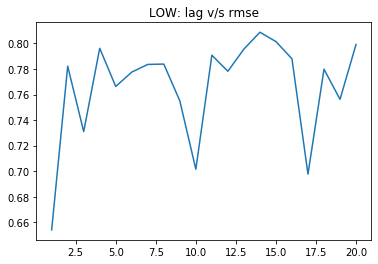

In [25]:
p = [i+1 for i in range(20)]
plt.plot(p,RMSE_p)
plt.title('LOW: lag v/s rmse')

In [26]:
###### RMSE for different values of p for one High_DATASET
#### TRAINING MODEL FOR A PARTICULAR LAG VALUE AND DATASET
p = 20
RMSE_p = []
for i in range(1,p+1):
    data_High = data_prep(data, 'difference_High')
    MAX_LAG = i
    LENGTH_GENOME = max(data_High.index)
    beta_High = AR_Model(MAX_LAG, data_High)
    #print(beta_High)

    ## PREDICTING DIFFERENCED VALUES USING BETA
    true_values = data.copy()[(len(data)-30)-MAX_LAG:]['difference_High'].values
    predictions = predict(beta_High, true_values)

    ## PREDICTING ACTUAL VALUES
    true_High_values = list(data.copy()[(len(data)-30)-MAX_LAG:].High)
    predict_High = []
    for i in range(len(predictions)):
        predicted_value = round(true_High_values[i+MAX_LAG-1] + predictions[i],2)
        predict_High.append(predicted_value)
    RMSE_p.append(RMSE(predict_High, true_High_values[MAX_LAG:]))


Text(0.5, 1.0, 'HIGH: lag v/s rmse')

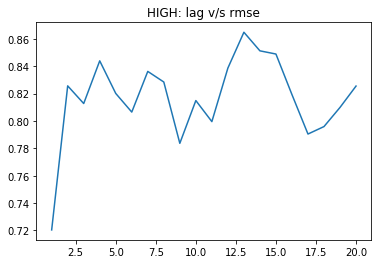

In [27]:
p = [i+1 for i in range(20)]
plt.plot(p,RMSE_p)
plt.title('HIGH: lag v/s rmse')

In [28]:
###### RMSE for different values of p for one Open_DATASET
#### TRAINING MODEL FOR A PARTICULAR LAG VALUE AND DATASET
p = 20
RMSE_p = []
for i in range(1,p+1):
    data_Open = data_prep(data, 'difference_Open')
    MAX_LAG = i
    LENGTH_GENOME = max(data_Open.index)
    beta_Open = AR_Model(MAX_LAG, data_Open)
    #print(beta_Open)

    ## PREDICTING DIFFERENCED VALUES USING BETA
    true_values = data.copy()[(len(data)-30)-MAX_LAG:]['difference_Open'].values
    predictions = predict(beta_Open, true_values)

    ## PREDICTING ACTUAL VALUES
    true_Open_values = list(data.copy()[(len(data)-30)-MAX_LAG:].Open)
    predict_Open = []
    for i in range(len(predictions)):
        predicted_value = round(true_Open_values[i+MAX_LAG-1] + predictions[i],2)
        predict_Open.append(predicted_value)
    RMSE_p.append(RMSE(predict_Open, true_Open_values[MAX_LAG:]))


Text(0.5, 1.0, 'Open: lag v/s rmse')

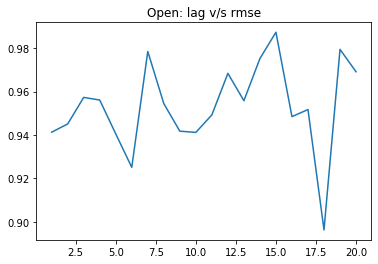

In [29]:
p = [i+1 for i in range(20)]
plt.plot(p,RMSE_p)
plt.title('Open: lag v/s rmse')